In [43]:
import matplotlib.pyplot as plt
from util import build_tableau, pivoting, correct_all_tableau
from simplex_algorithm import simplex, dual_simplex, two_phases
import sympy as sp
import numpy as np
np.set_printoptions(suppress=True, linewidth=np.nan)


In [2]:
def pivoting_symbolic(tableau: np.ndarray, row: int, col: int) -> np.ndarray:
    # escale pivot row min to 1.0
    tableau[row, :] = tableau[row, :] / tableau[row, col]
    # pivot proccess: convert al column to zero except row
    for k in range(tableau.shape[0]):
        if k != row:
            tableau[k, :] = tableau[k, :] - tableau[k, col] * tableau[row, :]


def correct_symbolic_cost(tableau: np.ndarray, basic_var: list[int]) -> None:
    # correct basic variable cost with value distict of zero
    for index, col in enumerate(basic_var):
        row = index + 1
        tableau[0, :] = tableau[0, :] - tableau[0, col] * tableau[row, :]
    print(f"Cost corrected")


# Pregunta 1

In [9]:
A = [[1, 1, 1., 1, 0, 0],
     [2, 1, 2., 0, 1, 0],
     [1, 1, -1, 0, 0, 1]]

b = lambda beta: [2, 4, 2.0 + beta]

c = lambda alpha: [1, 1 + alpha, -2.0, 0, 0, 0]

alpha = sp.symbols("\\alpha")
beta = sp.symbols("\\beta")

vertex = [2. 0. 0.]

In [23]:
basic_var = [3, 4, 5]
tableau = build_tableau(A, b(0), c(0))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(alpha)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)


vertex = [0. 0. 0.], x_B = [4, 5, 6]
[[ 1.  1. -2.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  2.]
 [ 2.  1.  2.  0.  1.  0.  4.]
 [ 1.  1. -1.  0.  0.  1.  2.]]
vertex = [2. 0. 0.], x_B = [1, 5, 6]
[[ 0.  0. -3. -1.  0.  0. -2.]
 [ 1.  1.  1.  1.  0.  0.  2.]
 [ 0. -1.  0. -2.  1.  0.  0.]
 [ 0.  0. -2. -1.  0.  1.  0.]]


Matrix([
[  1, \alpha + 1, -2.0,    0,   0,   0,   0],
[1.0,        1.0,  1.0,  1.0,   0,   0, 2.0],
[  0,       -1.0,    0, -2.0, 1.0,   0,   0],
[  0,          0, -2.0, -1.0,   0, 1.0,   0]])

Cost corrected


Matrix([
[0, \alpha, -3, -1, 0, 0, -2],
[1,      1,  1,  1, 0, 0,  2],
[0,     -1,  0, -2, 1, 0,  0],
[0,      0, -2, -1, 0, 1,  0]])

In [24]:
tableau_1 = np.copy(tableau)
basic_var_1 = np.copy(basic_var)
pivoting(tableau_1, 1, 1)
basic_var_1[0] = 1
print(f"{basic_var_1}\n{tableau_1}")

opt_tableau = sp.Matrix(tableau_1.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(alpha)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)

[1 4 5]
[[ 0.  0. -3. -1.  0.  0. -2.]
 [ 1.  1.  1.  1.  0.  0.  2.]
 [ 1.  0.  1. -1.  1.  0.  2.]
 [ 0.  0. -2. -1.  0.  1.  0.]]


Matrix([
[  1, \alpha + 1, -2.0,    0,   0,   0,   0],
[1.0,        1.0,  1.0,  1.0,   0,   0, 2.0],
[1.0,          0,  1.0, -1.0, 1.0,   0, 2.0],
[  0,          0, -2.0, -1.0,   0, 1.0,   0]])

Cost corrected


Matrix([
[0, \alpha, -3, -1, 0, 0, -2],
[1,      1,  1,  1, 0, 0,  2],
[1,      0,  1, -1, 1, 0,  2],
[0,      0, -2, -1, 0, 1,  0]])

In [34]:
basic_var = [3, 4, 5]
tableau = build_tableau(A, b(0), c(0.001))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(alpha)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)


vertex = [0. 0. 0.], x_B = [4, 5, 6]
[[ 1.     1.001 -2.     0.     0.     0.     0.   ]
 [ 1.     1.     1.     1.     0.     0.     2.   ]
 [ 2.     1.     2.     0.     1.     0.     4.   ]
 [ 1.     1.    -1.     0.     0.     1.     2.   ]]
vertex = [0. 2. 0.], x_B = [2, 5, 6]
[[-0.001  0.    -3.001 -1.001  0.     0.    -2.002]
 [ 1.     1.     1.     1.     0.     0.     2.   ]
 [ 1.     0.     1.    -1.     1.     0.     2.   ]
 [ 0.     0.    -2.    -1.     0.     1.     0.   ]]


Matrix([
[  1, \alpha + 1, -2.0,    0,   0,   0,   0],
[1.0,        1.0,  1.0,  1.0,   0,   0, 2.0],
[1.0,          0,  1.0, -1.0, 1.0,   0, 2.0],
[  0,          0, -2.0, -1.0,   0, 1.0,   0]])

Cost corrected


Matrix([
[-\alpha, 0, -\alpha - 3, -\alpha - 1, 0, 0, -2*\alpha - 2],
[      1, 1,           1,           1, 0, 0,             2],
[      1, 0,           1,          -1, 1, 0,             2],
[      0, 0,          -2,          -1, 0, 1,             0]])

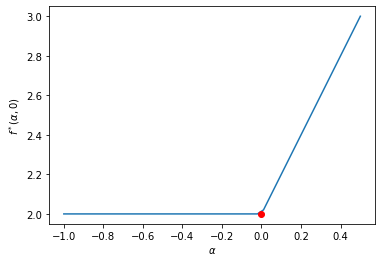

In [30]:
z = lambda delta: 2 if delta < 0 else 2 * delta + 2

interval = np.linspace(-1, 0.5)
z_plot = [z(d) for d in interval]

plt.xlabel("$\\alpha$")
plt.ylabel("$f^*(\\alpha, 0)$")
plt.plot(interval, z_plot)
plt.plot(0, z(0), 'o', c='r')
plt.axis("scaled")
plt.show()


# Pregunta 2

In [38]:
def build_matrix(number_node: int, edges: tuple[int, int]):
    # Output: matrix mx(n+1) A, with component i=1, j=-1, and last component 1
    number_edge = len(edges)
    A = np.zeros((number_node, number_edge))
    for i, edge in enumerate(edges):
        A[edge[0] - 1, i] = 1
        A[edge[1] - 1, i] = -1
    return A


In [66]:
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, np.Inf)]  # (4, inf)
number_node = 4
A = np.array([[1., 1., 0., 0., 0., 0],
              [-1., 0., 1., 1., 0., 0],
              [0., 1., 1., 0., -1., 0],
              [0., 0., 0., 1., 1., -1]])
b = [5, 3, 6, 2.]
c = [-2, -8, -4, -2, -9., 0]

tableau = build_tableau(A, b, c)
basic_var = [0, 3, 2, 5]
print(tableau)
correct_all_tableau(tableau, basic_var)
simplex(tableau, basic_var)


[[-2. -8. -4. -2. -9.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  5.]
 [-1.  0.  1.  1.  0.  0.  3.]
 [ 0.  1.  1.  0. -1.  0.  6.]
 [ 0.  0.  0.  1.  1. -1.  2.]]
All tableau corrected
vertex = [5. 0.], x_B = [1, 4, 3, 6]
[[  0.  -2.   0.   0. -11.   0.  38.]
 [  1.   1.   0.   0.   0.   0.   5.]
 [  0.   0.   0.   1.   1.   0.   2.]
 [  0.   1.   1.   0.  -1.   0.   6.]
 [ -0.  -0.  -0.  -0.  -0.   1.  -0.]]


array([[  0.,  -2.,   0.,   0., -11.,   0.,  38.],
       [  1.,   1.,   0.,   0.,   0.,   0.,   5.],
       [  0.,   0.,   0.,   1.,   1.,   0.,   2.],
       [  0.,   1.,   1.,   0.,  -1.,   0.,   6.],
       [ -0.,  -0.,  -0.,  -0.,  -0.,   1.,  -0.]])

In [40]:
tableau = build_tableau(A, b, c)
basic_var = [0, 1, 2, 3]
print(tableau)
correct_all_tableau(tableau, basic_var)
simplex(tableau, basic_var)

array([[ 1.,  1.,  0.,  0.,  0.],
       [-1.,  0.,  1.,  0.,  1.],
       [ 0., -1., -1.,  1.,  0.],
       [ 0.,  0.,  0., -1., -1.]])